In [764]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [765]:
# Downloaded combine csv to my desktop, therefore change directory to my pc desktop
os.chdir('C:\Users\chads\Desktop')

In [766]:
# Import and preview the raw combine data
combine = pd.read_csv("combine.csv")
combine.head()

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,vertical,broad,bench,round,college,pick,pickround,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,Ameer,Abdullah,RB,5,9.0,69.0,205,0.0,...,42.5,130,24,0,Nebraska,NaN,0,0,0,5.9
1,2015,Nelson Agholor,Nelson,Agholor,WR,6,0.0,72.0,198,0.0,...,0.0,0,12,0,USC,NaN,0,0,0,5.6
2,2015,Jay Ajayi,Jay,Ajayi,RB,6,0.0,72.0,221,0.0,...,39.0,121,19,0,Boise St.,NaN,0,0,0,6.0
3,2015,Kwon Alexander,Kwon,Alexander,OLB,6,1.0,73.0,227,0.0,...,36.0,121,24,0,LSU,NaN,0,0,0,5.4
4,2015,Mario Alford,Mario,Alford,WR,5,8.0,68.0,180,0.0,...,34.0,121,13,0,West Virginia,NaN,0,0,0,5.3


In [767]:
print(combine.shape)

(4947, 26)


In [768]:
# Drop insignificant and redundant columns
nfl = (combine.drop(['firstname','lastname','heightfeet','heightinches','pick','pickround'],axis=1))
nfl.head()

,year,name,position,heightinchestotal,weight,arms,hands,fortyyd,twentyyd,tenyd,twentyss,threecone,vertical,broad,bench,round,college,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,RB,69.0,205,0.0,0.0,4.60,0.0,0.0,3.95,6.79,42.5,130,24,0,Nebraska,0,0,5.9
1,2015,Nelson Agholor,WR,72.0,198,0.0,0.0,4.42,0.0,0.0,0.00,0.00,0.0,0,12,0,USC,0,0,5.6
2,2015,Jay Ajayi,RB,72.0,221,0.0,0.0,4.57,0.0,0.0,4.10,7.10,39.0,121,19,0,Boise St.,0,0,6.0
3,2015,Kwon Alexander,OLB,73.0,227,0.0,0.0,4.55,0.0,0.0,4.20,7.14,36.0,121,24,0,LSU,0,0,5.4
4,2015,Mario Alford,WR,68.0,180,0.0,0.0,4.43,0.0,0.0,4.07,6.64,34.0,121,13,0,West Virginia,0,0,5.3


In [770]:
# checking columns dropped and they were..
print(nfl.shape)

(4947, 20)


In [771]:
# checking column data types and 0 values are considered non-null which needs to be changed
print(nfl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4947 entries, 0 to 4946
Data columns (total 20 columns):
year                 4947 non-null int64
name                 4947 non-null object
position             4947 non-null object
heightinchestotal    4947 non-null float64
weight               4947 non-null int64
arms                 4947 non-null float64
hands                4947 non-null float64
fortyyd              4947 non-null float64
twentyyd             4946 non-null float64
tenyd                4945 non-null float64
twentyss             4947 non-null float64
threecone            4947 non-null float64
vertical             4947 non-null float64
broad                4947 non-null int64
bench                4947 non-null int64
round                4947 non-null int64
college              3477 non-null object
picktotal            4947 non-null int64
wonderlic            4947 non-null int64
nflgrade             4947 non-null float64
dtypes: float64(10), int64(7), object(3)
memory us

In [772]:
# Count how many rows are 0.0 in the arms column
arm = nfl["arms"].value_counts().nlargest()
print(arm)

0.0     3784
32.0      87
33.0      86
32.5      67
34.0      62
Name: arms, dtype: int64


In [773]:
# Function to calculate percentage
def percentage(part, whole):
  return 100 * float(part)/float(whole)

In [774]:
# Percentage of missing data that is 0.0 in the arms column
missing_arm_data = percentage(3784, 4947)
print("Percentage of missing data in column arms: "+ str(missing_arm_data)+"%")

Percentage of missing data in column arms: 76.4908025066%


In [775]:
# Since 76.49% of the arms column has missing data, will drop the column
nfla = (nfl.drop(['arms'],axis=1))
nfla.head()

,year,name,position,heightinchestotal,weight,hands,fortyyd,twentyyd,tenyd,twentyss,threecone,vertical,broad,bench,round,college,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,RB,69.0,205,0.0,4.60,0.0,0.0,3.95,6.79,42.5,130,24,0,Nebraska,0,0,5.9
1,2015,Nelson Agholor,WR,72.0,198,0.0,4.42,0.0,0.0,0.00,0.00,0.0,0,12,0,USC,0,0,5.6
2,2015,Jay Ajayi,RB,72.0,221,0.0,4.57,0.0,0.0,4.10,7.10,39.0,121,19,0,Boise St.,0,0,6.0
3,2015,Kwon Alexander,OLB,73.0,227,0.0,4.55,0.0,0.0,4.20,7.14,36.0,121,24,0,LSU,0,0,5.4
4,2015,Mario Alford,WR,68.0,180,0.0,4.43,0.0,0.0,4.07,6.64,34.0,121,13,0,West Virginia,0,0,5.3


In [776]:
# Count how many rows are 0.0 in the hands column
hand = nfla["hands"].value_counts().nlargest()
print(hand)

0.00     3783
9.00      115
9.50      115
9.25      107
10.00     106
Name: hands, dtype: int64


In [777]:
# Percentage of amount of rows are 0.0 in hands column
missing_hand_data = percentage(3783, 4947)
print("Percentage of missing data in column hands: "+ str(missing_hand_data)+"%")

Percentage of missing data in column hands: 76.4705882353%


In [778]:
# Since 76.47% of the hands column has missing data, will drop the column
nflb = (nfla.drop(['hands'],axis=1))
nfl.head()

,year,name,position,heightinchestotal,weight,arms,hands,fortyyd,twentyyd,tenyd,twentyss,threecone,vertical,broad,bench,round,college,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,RB,69.0,205,0.0,0.0,4.60,0.0,0.0,3.95,6.79,42.5,130,24,0,Nebraska,0,0,5.9
1,2015,Nelson Agholor,WR,72.0,198,0.0,0.0,4.42,0.0,0.0,0.00,0.00,0.0,0,12,0,USC,0,0,5.6
2,2015,Jay Ajayi,RB,72.0,221,0.0,0.0,4.57,0.0,0.0,4.10,7.10,39.0,121,19,0,Boise St.,0,0,6.0
3,2015,Kwon Alexander,OLB,73.0,227,0.0,0.0,4.55,0.0,0.0,4.20,7.14,36.0,121,24,0,LSU,0,0,5.4
4,2015,Mario Alford,WR,68.0,180,0.0,0.0,4.43,0.0,0.0,4.07,6.64,34.0,121,13,0,West Virginia,0,0,5.3


In [779]:
# Count how many rows are 0.0 in the twentyyd column
twenty = nflb["twentyyd"].value_counts().nlargest()
print(twenty)

0.00    4806
2.62      13
2.65       9
2.60       8
2.59       7
Name: twentyyd, dtype: int64


In [780]:
# Percentage of missing data that is 0.0 in the twentyyd column
missing_twenty_data = percentage(4804, 4947)
print("Percentage of missing data in column twentyyd: "+ str(missing_twenty_data)+"%")

Percentage of missing data in column twentyyd: 97.1093592076%


In [781]:
# Since ~97.11% of the twentyyd column has missing data, will drop the column
nflc = (nflb.drop(['twentyyd'],axis=1))
nfl.head()

,year,name,position,heightinchestotal,weight,arms,hands,fortyyd,twentyyd,tenyd,twentyss,threecone,vertical,broad,bench,round,college,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,RB,69.0,205,0.0,0.0,4.60,0.0,0.0,3.95,6.79,42.5,130,24,0,Nebraska,0,0,5.9
1,2015,Nelson Agholor,WR,72.0,198,0.0,0.0,4.42,0.0,0.0,0.00,0.00,0.0,0,12,0,USC,0,0,5.6
2,2015,Jay Ajayi,RB,72.0,221,0.0,0.0,4.57,0.0,0.0,4.10,7.10,39.0,121,19,0,Boise St.,0,0,6.0
3,2015,Kwon Alexander,OLB,73.0,227,0.0,0.0,4.55,0.0,0.0,4.20,7.14,36.0,121,24,0,LSU,0,0,5.4
4,2015,Mario Alford,WR,68.0,180,0.0,0.0,4.43,0.0,0.0,4.07,6.64,34.0,121,13,0,West Virginia,0,0,5.3


In [782]:
# Count how many rows are 0.0 in the tenyyd column
ten = nflc["tenyd"].value_counts().nlargest()
print(ten)

0.00    4546
1.53      28
1.58      23
1.60      22
1.57      20
Name: tenyd, dtype: int64


In [783]:
# Percentage of missing data that is 0.0 in the tenyd column
missing_ten_data = percentage(4546, 4947)
print("Percentage of missing data in column tenyd: "+ str(missing_ten_data)+"%")

Percentage of missing data in column tenyd: 91.8940772185%


In [784]:
# Since ~91.89% of the tenyd column has missing data, will drop the column
nfld = (nflc.drop(['tenyd'],axis=1))
nfld.head()

,year,name,position,heightinchestotal,weight,fortyyd,twentyss,threecone,vertical,broad,bench,round,college,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,RB,69.0,205,4.60,3.95,6.79,42.5,130,24,0,Nebraska,0,0,5.9
1,2015,Nelson Agholor,WR,72.0,198,4.42,0.00,0.00,0.0,0,12,0,USC,0,0,5.6
2,2015,Jay Ajayi,RB,72.0,221,4.57,4.10,7.10,39.0,121,19,0,Boise St.,0,0,6.0
3,2015,Kwon Alexander,OLB,73.0,227,4.55,4.20,7.14,36.0,121,24,0,LSU,0,0,5.4
4,2015,Mario Alford,WR,68.0,180,4.43,4.07,6.64,34.0,121,13,0,West Virginia,0,0,5.3


In [785]:
# Count how many rows are 0.0 in the forty, twentyss, threecone, vertical, broad, and bench columns
forty = nfld["fortyyd"].value_counts().nlargest()
twentyss = nfld["twentyss"].value_counts().nlargest()
three = nfld["threecone"].value_counts().nlargest()
vert = nfld["vertical"].value_counts().nlargest()
broad = nfld["broad"].value_counts().nlargest()
bench = nfld["bench"].value_counts().nlargest()

print(forty)
print(twentyss)
print(three)
print(vert)
print(broad)
print(bench)

0.00    191
4.50    110
4.53     96
4.56     95
4.65     92
Name: fortyyd, dtype: int64
0.00    1226
4.40      86
4.21      82
4.20      79
4.32      78
Name: twentyss, dtype: int64
0.00    3913
7.07      31
7.08      22
7.15      19
6.97      19
Name: threecone, dtype: int64
0.0     622
33.0    243
34.0    230
35.0    212
36.0    197
Name: vertical, dtype: int64
0      762
117    203
115    201
118    201
120    200
Name: broad, dtype: int64
0     1295
23     235
19     228
24     223
21     223
Name: bench, dtype: int64


In [786]:
# Percentage of missing data that is 0.0 in the forty, twentyss, threecone, vertical, broad, and bench columns
missing_forty_data = percentage(191, 4947)
missing_twentyss_data = percentage(1226, 4947)
missing_three_data = percentage(3913, 4947)
missing_vert_data = percentage(622, 4947)
missing_broad_data = percentage(762, 4947)
missing_bench_data = percentage(1295, 4947)

print("Percentage of missing data in column fortyyd:   "+ str(missing_forty_data)+"%")
print("Percentage of missing data in column twentyss:  "+ str(missing_twentyss_data)+"%")
print("Percentage of missing data in column threecone: "+ str(missing_three_data)+"%")
print("Percentage of missing data in column vertical:  "+ str(missing_vert_data)+"%")
print("Percentage of missing data in column broad:     "+ str(missing_broad_data)+"%")
print("Percentage of missing data in column bench:     "+ str(missing_bench_data)+"%")

Percentage of missing data in column fortyyd:   3.86092581362%
Percentage of missing data in column twentyss:  24.7826965838%
Percentage of missing data in column threecone: 79.0984435011%
Percentage of missing data in column vertical:  12.5732767334%
Percentage of missing data in column broad:     15.4032747119%
Percentage of missing data in column bench:     26.1774813018%


In [787]:
# count amount of different values in column position
pos = nfld["position"].value_counts()
print(pos)

WR     631
CB     490
RB     455
DE     415
OT     390
DT     370
OLB    364
OG     330
QB     304
TE     291
ILB    225
FS     211
SS     184
OC     132
FB     102
C       21
P       12
K        9
NT       9
LS       2
Name: position, dtype: int64


In [788]:
# OC and C BOTH represent the center position. 
# Instead of having 2 different values for the same position, now their is one by replacing OC with C
nfld['position'].replace({'OC': 'C'}, inplace=True)
nfld["position"].value_counts()

WR     631
CB     490
RB     455
DE     415
OT     390
DT     370
OLB    364
OG     330
QB     304
TE     291
ILB    225
FS     211
SS     184
C      153
FB     102
P       12
K        9
NT       9
LS       2
Name: position, dtype: int64

In [789]:
nfld.shape

(4947, 16)

In [790]:
# No interest in analyzing long snappers
nfle = nfld[nfld.position != 'LS']
nfle.shape

(4945, 16)

In [791]:
# No interest in analyzing kickers
nfle = nfle[nfld.position != 'K']
nfle.shape

C:\Users\chads\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


(4936, 16)

In [792]:
# No interest in analyzing punters
nfle = nfle[nfld.position != 'P']
nfle.shape

C:\Users\chads\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


(4924, 16)

In [793]:
# checking to see if column position with values K, P, and LS are dropped
nfle["position"].value_counts()

WR     631
CB     490
RB     455
DE     415
OT     390
DT     370
OLB    364
OG     330
QB     304
TE     291
ILB    225
FS     211
SS     184
C      153
FB     102
NT       9
Name: position, dtype: int64

In [794]:
# NT and DT are pretty much the same thing so will replace the NT value to DT
# FS and SS are pretty much the same thing so will rename both to S
nfle['position'].replace({'NT': 'DT','FS': 'S','SS': 'S'}, inplace=True)
nfle["position"].value_counts()

WR     631
CB     490
RB     455
DE     415
S      395
OT     390
DT     379
OLB    364
OG     330
QB     304
TE     291
ILB    225
C      153
FB     102
Name: position, dtype: int64

In [795]:
# With kickers, punters and long snappers deleted,
# Count how many rows have no values in the forty, twentyss, threecone, vertical, broad, and bench columns
forty = nfle["fortyyd"].value_counts().nlargest()
twentyss = nfle["twentyss"].value_counts().nlargest()
three = nfle["threecone"].value_counts().nlargest()
vert = nfld["vertical"].value_counts().nlargest()
broad = nfle["broad"].value_counts().nlargest()
bench = nfle["bench"].value_counts().nlargest()

print(forty)
print(twentyss)
print(three)
print(vert)
print(broad)
print(bench)

0.00    172
4.50    110
4.53     96
4.56     95
4.65     92
Name: fortyyd, dtype: int64
0.00    1203
4.40      86
4.21      82
4.20      79
4.32      78
Name: twentyss, dtype: int64
0.00    3890
7.07      31
7.08      22
7.15      19
6.97      19
Name: threecone, dtype: int64
0.0     622
33.0    243
34.0    230
35.0    212
36.0    197
Name: vertical, dtype: int64
0      739
117    203
115    201
118    201
120    200
Name: broad, dtype: int64
0     1275
23     234
19     228
24     223
21     223
Name: bench, dtype: int64


In [796]:
# With kickers, punters and long snappers deleted,
# Percentage of data that is 0.0 in the forty, twentyss, threecone, vertical, broad, and bench columns
missing_forty_data = percentage(172, 4924)
missing_twentyss_data = percentage(1203, 4924)
missing_three_data = percentage(3890, 4924)
missing_vert_data = percentage(622, 4924)
missing_broad_data = percentage(739, 4924)
missing_bench_data = percentage(1275, 4924)
print('Percentage of missing values in the following columns:')

print("fortyyd:   "+ str(missing_forty_data))
print('twentyss:  '+ str(missing_twentyss_data))
print('threecone: '+ str(missing_three_data))
print('vertical:  '+ str(missing_vert_data))
print('broad:     '+ str(missing_broad_data))
print('bench:     '+ str(missing_bench_data))

Percentage of missing values in the following columns:
fortyyd:   3.49309504468
twentyss:  24.4313566206
threecone: 79.0008123477
vertical:  12.6320064988
broad:     15.0081234768
bench:     25.8935824533


In [797]:
# Slice up dataframe to only give columns position and fortyyd
nfle1 = nfle[['position','fortyyd']]
print(nfle1)

     position  fortyyd
0          RB     4.60
1          WR     4.42
2          RB     4.57
3         OLB     4.55
4          WR     4.43
5          RB     4.53
6           S     4.56
7          WR     0.00
8          DE     5.03
9          TE     0.00
10        ILB     4.56
11         DT     5.10
12         RB     4.53
13        OLB     0.00
14         DE     4.80
16        OLB     4.53
17         TE     4.80
18         WR     4.42
19         QB     4.81
20         DT     0.00
21         TE     0.00
22         DT     5.02
23         OG     5.57
24          S     0.00
25         QB     5.03
26         OT     5.60
27         TE     5.04
28         QB     4.72
30         WR     4.54
31         RB     0.00
...       ...      ...
4917       TE     5.00
4918       CB     4.34
4919       CB     4.65
4920       DE     5.02
4921       TE     4.93
4922       OT     5.51
4923       OT     5.09
4924      ILB     4.72
4925       RB     4.53
4926       DT     5.23
4927       QB     5.13
4928       

In [798]:
# Grouping position column with fortyyd column, which I later found out I never had to do this, but will keep it for practice
s = nfle1.groupby('position')['fortyyd'].apply(lambda x: x.tolist())
print s

position
C      [5.31, 5.15, 5.25, 5.5, 0.0, 0.0, 0.0, 0.0, 4....
CB     [4.51, 4.62, 4.53, 4.48, 4.38, 4.56, 4.5, 0.0,...
DE     [5.03, 4.8, 4.79, 4.79, 5.01, 4.97, 4.93, 4.9,...
DT     [5.1, 0.0, 5.02, 5.05, 4.86, 0.0, 5.07, 5.18, ...
FB     [4.74, 4.94, 0.0, 4.95, 4.87, 0.0, 4.87, 4.69,...
ILB    [4.56, 4.93, 0.0, 4.6, 4.59, 4.83, 4.95, 4.61,...
OG     [5.57, 5.29, 0.0, 5.25, 5.55, 5.33, 5.2, 5.19,...
OLB    [4.55, 0.0, 4.53, 0.0, 4.95, 4.74, 5.06, 4.56,...
OT     [5.6, 0.0, 5.14, 5.19, 5.12, 5.26, 5.31, 5.01,...
QB     [4.81, 5.03, 4.72, 4.94, 4.63, 0.0, 0.0, 4.63,...
RB     [4.6, 4.57, 4.53, 4.53, 0.0, 4.62, 4.57, 4.81,...
S      [4.56, 0.0, 0.0, 4.53, 4.36, 4.65, 4.63, 4.55,...
TE     [0.0, 4.8, 0.0, 5.04, 4.87, 4.98, 0.0, 0.0, 4....
WR     [4.42, 4.43, 0.0, 4.42, 4.54, 4.51, 4.43, 4.35...
Name: fortyyd, dtype: object


In [799]:
# Now creating a dictionary with column position as the key and fortyyd column the values
# Later found out that this was not necessary, but will keep this cell for practice/reference
pos_dict = s.to_dict()
pos_dict

{'C': [5.31,
  5.15,
  5.25,
  5.5,
  0.0,
  0.0,
  0.0,
  0.0,
  4.98,
  5.36,
  5.18,
  5.15,
  5.13,
  0.0,
  0.0,
  0.0,
  5.34,
  5.1,
  5.17,
  0.0,
  5.28,
  5.33,
  5.58,
  0.0,
  5.33,
  5.38,
  5.2,
  4.99,
  5.43,
  5.25,
  5.35,
  5.42,
  5.44,
  0.0,
  0.0,
  5.38,
  4.93,
  5.18,
  5.27,
  4.89,
  5.36,
  5.12,
  5.52,
  5.18,
  5.29,
  5.04,
  5.55,
  5.21,
  5.19,
  5.25,
  5.25,
  5.15,
  5.19,
  5.05,
  5.24,
  5.09,
  5.2,
  5.39,
  5.36,
  5.14,
  5.19,
  5.26,
  5.4,
  5.19,
  5.24,
  5.25,
  4.99,
  5.22,
  5.47,
  5.35,
  5.3,
  5.13,
  5.28,
  5.35,
  4.96,
  5.46,
  5.32,
  5.35,
  5.24,
  5.2,
  4.83,
  5.42,
  5.13,
  5.05,
  5.12,
  5.24,
  5.55,
  4.99,
  5.4,
  5.31,
  5.09,
  5.21,
  5.31,
  4.96,
  4.84,
  5.29,
  0.0,
  5.21,
  5.25,
  5.16,
  5.5,
  5.2,
  4.98,
  5.26,
  5.06,
  5.84,
  5.29,
  5.3,
  5.3,
  5.16,
  5.42,
  5.43,
  5.19,
  5.26,
  5.2,
  5.41,
  5.19,
  5.1,
  5.46,
  5.07,
  4.97,
  4.92,
  5.07,
  5.37,
  5.33,
  5.37,
  5.0,
  5.26

In [800]:
# Replace all 0 values with NaN, so calculations will exclude NaN values.
nflnan = nfle.replace(0.00, np.NaN)
nflnan

,year,name,position,heightinchestotal,weight,fortyyd,twentyss,threecone,vertical,broad,bench,round,college,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,RB,69.0,205,4.60,3.95,6.79,42.5,130.0,24.0,NaN,Nebraska,NaN,NaN,5.9
1,2015,Nelson Agholor,WR,72.0,198,4.42,NaN,NaN,NaN,NaN,12.0,NaN,USC,NaN,NaN,5.6
2,2015,Jay Ajayi,RB,72.0,221,4.57,4.10,7.10,39.0,121.0,19.0,NaN,Boise St.,NaN,NaN,6.0
3,2015,Kwon Alexander,OLB,73.0,227,4.55,4.20,7.14,36.0,121.0,24.0,NaN,LSU,NaN,NaN,5.4
4,2015,Mario Alford,WR,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,NaN,West Virginia,NaN,NaN,5.3
5,2015,Javorius Allen,RB,72.0,221,4.53,4.28,6.96,35.5,121.0,11.0,NaN,USC,NaN,NaN,5.3
6,2015,Adrian Amos,S,72.0,218,4.56,4.03,7.09,35.5,122.0,NaN,NaN,Penn St.,NaN,NaN,5.5
7,2015,Dres Anderson,WR,73.0,187,NaN,NaN,NaN,NaN,NaN,13.0,NaN,Utah,NaN,NaN,5.5
8,2015,Henry Anderson,DE,78.0,294,5.03,4.19,7.20,30.0,111.0,NaN,NaN,Stanford,NaN,NaN,5.6
9,2015,Rory 'Busta' Anderson,TE,77.0,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Carolina,NaN,NaN,5.5


In [801]:
# With NaN in place, let's check the amount of non-null's in each column.
# As expected, year, name, position, heightinchestotal, and weight columns have zero NaN entries and are complete
nflnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4924 entries, 0 to 4946
Data columns (total 16 columns):
year                 4924 non-null int64
name                 4924 non-null object
position             4924 non-null object
heightinchestotal    4924 non-null float64
weight               4924 non-null int64
fortyyd              4752 non-null float64
twentyss             3721 non-null float64
threecone            1034 non-null float64
vertical             4321 non-null float64
broad                4185 non-null float64
bench                3649 non-null float64
round                3042 non-null float64
college              3454 non-null object
picktotal            3042 non-null float64
wonderlic            222 non-null float64
nflgrade             628 non-null float64
dtypes: float64(11), int64(2), object(3)
memory usage: 654.0+ KB


In [802]:
# checking to see if any players have the same name
# Appears some do have the same name
nflnan.groupby(["name","year"]).size().sort_values(ascending=False)

name               year
Brandon Moore      2002    2
Alex Smith         2005    2
Mike Green         2000    2
Ben Obomanu        2006    2
Derrick Johnson    2005    2
Kevin White        2015    2
Ziggy Ansah        2013    1
Dwayne Blakley     2002    1
Dusty Dvoracek     2006    1
Dwan Edwards       2004    1
Dwan Epps          2000    1
Dwayne Allen       2012    1
Dwayne Bowe        2007    1
Dustin Vaughan     2014    1
Dwayne Gratz       2013    1
Dwayne Harris      2011    1
Dwayne Missouri    2001    1
Dwayne Pierce      2002    1
Dwayne Slay        2006    1
Dwayne Wright      2007    1
Dwight Bentley     2012    1
Dustin Waldron     2012    1
Dustin McClintock  2001    1
Dustin Rykert      2003    1
Dwight Johnson     2000    1
Duane Brown        2008    1
Duane Coleman      2007    1
Duke Ihenacho      2012    1
Duke Johnson       2015    1
Duke Preston       2005    1
                          ..
Marko Mitchell     2009    1
Markus Curry       2005    1
Markus Golden      

In [803]:
# players with duplicate names, one will have _dp at the end of their name in order to avoid duplication
nflnan.name = nflnan.name.where(~nflnan.name.duplicated(), nflnan.name + '_dp')

In [804]:
# check to make sure no more duplicate players
nflnan.groupby(["name","year"]).size().sort_values(ascending=False)

name               year
Ziggy Ansah        2013    1
Dwan Epps          2000    1
Dustin Lyman       2000    1
Dustin McClintock  2001    1
Dustin Rykert      2003    1
Dustin Vaughan     2014    1
Dustin Waldron     2012    1
Dusty Dvoracek     2006    1
Dwan Edwards       2004    1
Dwayne Allen       2012    1
Drew Olson         2006    1
Dwayne Blakley     2002    1
Dwayne Bowe        2007    1
Dwayne Gratz       2013    1
Dwayne Harris      2011    1
Dwayne Missouri    2001    1
Dwayne Pierce      2002    1
Dwayne Slay        2006    1
Dustin Long        2005    1
Dustin Keller      2008    1
Dustin Fry         2007    1
Dustin Fox         2005    1
Drew Stanton       2007    1
Drew Strojny       2004    1
Drew Willy         2009    1
Dri Archer         2014    1
Drisan James       2007    1
Duane Brown        2008    1
Duane Coleman      2007    1
Duke Ihenacho      2012    1
                          ..
Marko Cavka        2004    1
Marko Mitchell     2009    1
Markus Curry       

In [805]:
# there were originally 2 Brandon Moore's in the name column. Check to make sure there is only one
nflnan.loc[nflnan['name'] == 'Brandon Moore']

,year,name,position,heightinchestotal,weight,fortyyd,twentyss,threecone,vertical,broad,bench,round,college,picktotal,wonderlic,nflgrade
3957,2002,Brandon Moore,DT,75.0,293,5.26,4.64,NaN,25.5,96.0,32.0,NaN,NaN,NaN,NaN,NaN


In [806]:
# checking to make sure the other Brandon Moore was assigned _dp, to make him unique from the one in the cell above
nflnan.loc[nflnan['name'] == 'Brandon Moore_dp']

,year,name,position,heightinchestotal,weight,fortyyd,twentyss,threecone,vertical,broad,bench,round,college,picktotal,wonderlic,nflgrade
3958,2002,Brandon Moore_dp,OLB,73.0,239,4.61,NaN,NaN,36.5,113.0,23.0,NaN,NaN,NaN,NaN,NaN


In [807]:
# checking to make sure we still have 4924 rows after uniquelly identifying players with the same name
nflnan.shape

(4924, 16)

In [808]:
# nflnan dataframe has nan values for column round in year 2015
# found this dataframe that has round information for year 2015 
# Import and preview the raw nfl_draft data
draft = pd.read_csv("nfl_draft.csv")
draft.head()

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,311.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Florida St.,NaN
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,516.0,4.0,1.0,41.0,1.0,NaN,NaN,NaN,Oregon,NaN
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,2.5,Florida,NaN
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,Alabama,NaN
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa,NaN


In [809]:
# Rename some column headers to match column headers of combine dataframe
draft = draft.rename(columns={'Player': 'name','Year': 'year','Rnd': 'round','Pick': 'picktotal'})
draft.head()

,Player_Id,year,round,picktotal,Tm,name,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,311.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Florida St.,NaN
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,516.0,4.0,1.0,41.0,1.0,NaN,NaN,NaN,Oregon,NaN
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,2.5,Florida,NaN
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,Alabama,NaN
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa,NaN


In [810]:
# Column headers in draft dataframe
list(draft.columns.values)

['Player_Id',
 'year',
 'round',
 'picktotal',
 'Tm',
 'name',
 'Pos',
 'Position Standard',
 'First4AV',
 'Age',
 'To',
 'AP1',
 'PB',
 'St',
 'CarAV',
 'DrAV',
 'G',
 'Cmp',
 'Pass_Att',
 'Pass_Yds',
 'Pass_TD',
 'Pass_Int',
 'Rush_Att',
 'Rush_Yds',
 'Rush_TDs',
 'Rec',
 'Rec_Yds',
 'Rec_Tds',
 'Tkl',
 'Def_Int',
 'Sk',
 'College/Univ',
 'Unnamed: 32']

In [811]:
# Drop insignificant or redundant columns
draft1 = (draft.drop(['Player_Id','Tm','Pos','Position Standard','First4AV','To','AP1','PB','St',
                     'CarAV','DrAV','G','Unnamed: 32'],axis=1))
draft1.head()

,year,round,picktotal,name,Age,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ
0,2015,1.0,1,Jameis Winston,21.0,540.0,913.0,6722.0,42.0,25.0,86.0,311.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Florida St.
1,2015,1.0,2,Marcus Mariota,21.0,458.0,725.0,5590.0,42.0,18.0,79.0,516.0,4.0,1.0,41.0,1.0,NaN,NaN,NaN,Oregon
2,2015,1.0,3,Dante Fowler,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,2.5,Florida
3,2015,1.0,4,Amari Cooper,21.0,NaN,NaN,NaN,NaN,NaN,3.0,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,Alabama
4,2015,1.0,5,Brandon Scherff,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa


In [812]:
# Making sure columns were deleted
list(draft1.columns.values)

['year',
 'round',
 'picktotal',
 'name',
 'Age',
 'Cmp',
 'Pass_Att',
 'Pass_Yds',
 'Pass_TD',
 'Pass_Int',
 'Rush_Att',
 'Rush_Yds',
 'Rush_TDs',
 'Rec',
 'Rec_Yds',
 'Rec_Tds',
 'Tkl',
 'Def_Int',
 'Sk',
 'College/Univ']

In [813]:
# Only include years 1999-2015 in draft2 dataframe, since these are the only years in nflnan dataframe
draft2 = (draft1[draft1["year"] >= 1999])
draft2.year.value_counts()

2003    262
2002    261
2014    256
2009    256
2015    256
2010    255
2006    255
2007    255
2005    255
2004    255
2011    254
2013    254
2000    254
1999    253
2012    253
2008    252
2001    246
Name: year, dtype: int64

In [814]:
# draft2 dataframe has less rows than nflnan and that's because this dataframe only has players that were drafted by an NFL team
# nflnan dataframe has players that were AND weren't drafted by an NFL team
draft2.shape

(4332, 20)

In [815]:
# checking to see if draft2 dataframe has players with the same name
draft2.groupby(["name","year"]).size().sort_values(ascending=False)

name               year
Alex Smith         2005    2
Derrick Johnson    2005    2
Robert Griffin     2012    2
E.J. Whitley       2006    1
Dwight Smith       2001    1
Dylan Gandy        2005    1
Dylan McFarland    2004    1
E.J. Biggers       2009    1
E.J. Gaines        2014    1
E.J. Henderson     2003    1
Zuriel Smith       2003    1
EJ Manuel          2013    1
Earl Bennett       2008    1
Earl Mitchell      2010    1
Earl Thomas        2010    1
Earl Watford       2013    1
Earl Wolff         2013    1
E.J. Wilson        2010    1
Dwight Lowery      2008    1
Eben Britton       2009    1
Dwight Freeney     2002    1
Dwayne Wright      2007    1
Dwayne Missouri    2001    1
Dwayne Jarrett     2007    1
Dwayne Harris      2011    1
Dwayne Gratz       2013    1
Dwayne Goodrich    2000    1
Dwayne Bowe        2007    1
Dwayne Allen       2012    1
Dwan Edwards       2004    1
                          ..
Matt Hill          2002    1
Matt Hazel         2014    1
Matt Giordano      

In [816]:
# players with same name in draft2 dataframe, one will have _dp at the end of their name to avoid duplication
draft2.name = draft2.name.where(~draft2.name.duplicated(), draft2.name + '_dp')

In [697]:
# No more duplicate names
draft2.groupby(["name","year"]).size().sort_values(ascending=False)

name               year
Zuriel Smith       2003    1
Dwight Lowery      2008    1
Earl Wolff         2013    1
Earl Watford       2013    1
Earl Thomas        2010    1
Earl Mitchell      2010    1
Earl Bennett       2008    1
EJ Manuel          2013    1
E.J. Wilson        2010    1
E.J. Whitley       2006    1
E.J. Henderson     2003    1
E.J. Gaines        2014    1
E.J. Biggers       2009    1
Dylan McFarland    2004    1
Dylan Gandy        2005    1
Dwight Smith       2001    1
Dwight Freeney     2002    1
Eben Britton       2009    1
Dwayne Wright      2007    1
Dwayne Missouri    2001    1
Dwayne Jarrett     2007    1
Dwayne Harris      2011    1
Dwayne Gratz       2013    1
Dwayne Goodrich    2000    1
Dwayne Bowe        2007    1
Dwayne Allen       2012    1
Dwan Edwards       2004    1
Dusty Dvoracek     2006    1
Dustin Rykert      2003    1
Dustin Lyman       2000    1
                          ..
Matt Johnson       2012    1
Matt Hill          2002    1
Matt Hazel         

In [817]:
# draft2 dataframe had 2 Alex Smith's, checking there is now only one
draft2.loc[draft2['name'] == 'Alex Smith']

,year,round,picktotal,name,Age,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ
2546,2005,1.0,1,Alex Smith,21.0,2411.0,3921.0,26421.0,151.0,87.0,446.0,1998.0,10.0,2.0,-10.0,0.0,9.0,NaN,NaN,Utah


In [818]:
# Making sure the other Alex Smith is now Alex Smith_dp
draft2.loc[draft2['name'] == 'Alex Smith_dp']

,year,round,picktotal,name,Age,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ
2616,2005,3.0,71,Alex Smith_dp,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0,1473.0,13.0,12.0,NaN,NaN,Stanford


In [819]:
# change column round data type to integer
draft2["round"] = draft2["round"].astype('int64')
draft2.dtypes

C:\Users\chads\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


year              int64
round             int64
picktotal         int64
name             object
Age             float64
Cmp             float64
Pass_Att        float64
Pass_Yds        float64
Pass_TD         float64
Pass_Int        float64
Rush_Att        float64
Rush_Yds        float64
Rush_TDs        float64
Rec             float64
Rec_Yds         float64
Rec_Tds         float64
Tkl             float64
Def_Int         float64
Sk               object
College/Univ     object
dtype: object

In [820]:
# left merge of dataframes nflnan and draft2 using name and year as keys to create new dataframe i
# check to make sure the merged dataframe has 4924 rows, just like the nflnan dataframe
i = pd.merge(nflnan, draft2, how = 'left', on=['name','year'])
i.shape

(4924, 34)

In [821]:
# making sure no duplicate names in i dataframe
i.groupby(["name","year"]).size().sort_values(ascending=False)

name               year
Ziggy Ansah        2013    1
Dwan Epps          2000    1
Dustin Lyman       2000    1
Dustin McClintock  2001    1
Dustin Rykert      2003    1
Dustin Vaughan     2014    1
Dustin Waldron     2012    1
Dusty Dvoracek     2006    1
Dwan Edwards       2004    1
Dwayne Allen       2012    1
Drew Olson         2006    1
Dwayne Blakley     2002    1
Dwayne Bowe        2007    1
Dwayne Gratz       2013    1
Dwayne Harris      2011    1
Dwayne Missouri    2001    1
Dwayne Pierce      2002    1
Dwayne Slay        2006    1
Dustin Long        2005    1
Dustin Keller      2008    1
Dustin Fry         2007    1
Dustin Fox         2005    1
Drew Stanton       2007    1
Drew Strojny       2004    1
Drew Willy         2009    1
Dri Archer         2014    1
Drisan James       2007    1
Duane Brown        2008    1
Duane Coleman      2007    1
Duke Ihenacho      2012    1
                          ..
Marko Cavka        2004    1
Marko Mitchell     2009    1
Markus Curry       

In [822]:
# i dataframe column headers
list(i.columns.values)

['year',
 'name',
 'position',
 'heightinchestotal',
 'weight',
 'fortyyd',
 'twentyss',
 'threecone',
 'vertical',
 'broad',
 'bench',
 'round_x',
 'college',
 'picktotal_x',
 'wonderlic',
 'nflgrade',
 'round_y',
 'picktotal_y',
 'Age',
 'Cmp',
 'Pass_Att',
 'Pass_Yds',
 'Pass_TD',
 'Pass_Int',
 'Rush_Att',
 'Rush_Yds',
 'Rush_TDs',
 'Rec',
 'Rec_Yds',
 'Rec_Tds',
 'Tkl',
 'Def_Int',
 'Sk',
 'College/Univ']

In [823]:
# drop insignificant or redundant columns from newdf dataframe
newdf = (i.drop(['nflgrade','round_x','picktotal_x','Cmp','Pass_Att','Pass_Yds','Pass_TD','Pass_Int','Rush_Att',
                'Rush_Yds','Rush_TDs','Rec','Rec_Yds','Rec_Tds','Tkl','Def_Int','Sk','Age','college','College/Univ'],axis=1))
list(newdf.columns.values)

['year',
 'name',
 'position',
 'heightinchestotal',
 'weight',
 'fortyyd',
 'twentyss',
 'threecone',
 'vertical',
 'broad',
 'bench',
 'wonderlic',
 'round_y',
 'picktotal_y']

In [824]:
# rename some column headers in newdf dataframe
newdf = newdf.rename(columns={'round_y': 'round','picktotal_y': 'picktotal'})
list(newdf.columns.values)

['year',
 'name',
 'position',
 'heightinchestotal',
 'weight',
 'fortyyd',
 'twentyss',
 'threecone',
 'vertical',
 'broad',
 'bench',
 'wonderlic',
 'round',
 'picktotal']

In [825]:
newdf.shape

(4924, 14)

In [826]:
# nflnan dataframe did not have any values for column round for all 2015 players
# after the merge, now all 2015 players that were drafted have a value in column round
newdf1 = newdf[['year','name','round']]
print(newdf1).head(10)

   year                   name  round
0  2015         Ameer Abdullah    2.0
1  2015         Nelson Agholor    1.0
2  2015              Jay Ajayi    5.0
3  2015         Kwon Alexander    4.0
4  2015           Mario Alford    7.0
5  2015         Javorius Allen    4.0
6  2015            Adrian Amos    5.0
7  2015          Dres Anderson    NaN
8  2015         Henry Anderson    3.0
9  2015  Rory 'Busta' Anderson    7.0


In [827]:
# showing how column round nan values for 2015 players, prior to merge
nflnan[['year','name','round']]

,year,name,round
0,2015,Ameer Abdullah,NaN
1,2015,Nelson Agholor,NaN
2,2015,Jay Ajayi,NaN
3,2015,Kwon Alexander,NaN
4,2015,Mario Alford,NaN
5,2015,Javorius Allen,NaN
6,2015,Adrian Amos,NaN
7,2015,Dres Anderson,NaN
8,2015,Henry Anderson,NaN
9,2015,Rory 'Busta' Anderson,NaN


In [828]:
# column year no longer needed and not significant or relevant for this study, therefore will drop it
newdf= (newdf.drop(['year'],axis=1))
list(newdf.columns.values)

['name',
 'position',
 'heightinchestotal',
 'weight',
 'fortyyd',
 'twentyss',
 'threecone',
 'vertical',
 'broad',
 'bench',
 'wonderlic',
 'round',
 'picktotal']

In [829]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4924 entries, 0 to 4923
Data columns (total 13 columns):
name                 4924 non-null object
position             4924 non-null object
heightinchestotal    4924 non-null float64
weight               4924 non-null int64
fortyyd              4752 non-null float64
twentyss             3721 non-null float64
threecone            1034 non-null float64
vertical             4321 non-null float64
broad                4185 non-null float64
bench                3649 non-null float64
wonderlic            222 non-null float64
round                3192 non-null float64
picktotal            3192 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 538.6+ KB


In [830]:
newdf.head()

,name,position,heightinchestotal,weight,fortyyd,twentyss,threecone,vertical,broad,bench,wonderlic,round,picktotal
0,Ameer Abdullah,RB,69.0,205,4.60,3.95,6.79,42.5,130.0,24.0,NaN,2.0,54.0
1,Nelson Agholor,WR,72.0,198,4.42,NaN,NaN,NaN,NaN,12.0,NaN,1.0,20.0
2,Jay Ajayi,RB,72.0,221,4.57,4.10,7.10,39.0,121.0,19.0,NaN,5.0,149.0
3,Kwon Alexander,OLB,73.0,227,4.55,4.20,7.14,36.0,121.0,24.0,NaN,4.0,124.0
4,Mario Alford,WR,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,NaN,7.0,238.0


In [831]:
import seaborn as sns

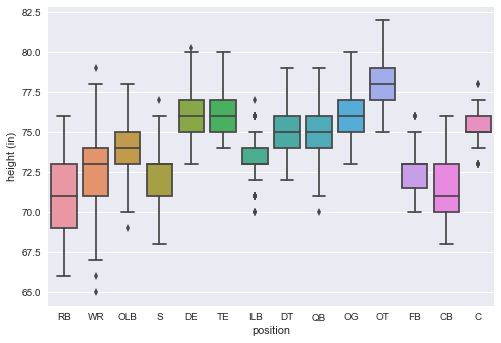

In [832]:
# checking position height percentile and outliers
# All outliers seem reasonable by not having a player be 2 feet tall or 12 feet tall
sns.boxplot(x='position', y='heightinchestotal', data=newdf)
plt.xlabel('position')
plt.ylabel('height (in)')
plt.show()

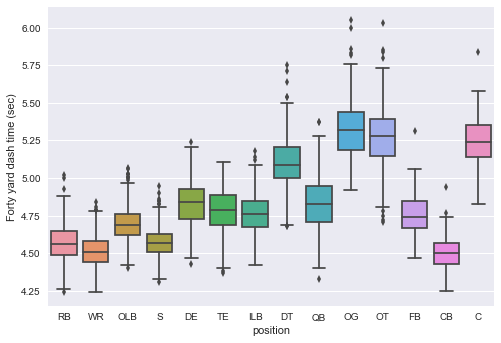

In [834]:
# checking position fortyyd percentile and outliers
# All outliers seem reasonable by not having a player be extremely slow or fast
sns.boxplot(x='position', y='fortyyd', data=newdf)
plt.xlabel('position')
plt.ylabel('Forty yard dash time (sec)')
plt.show()

In [ ]:
# checking position weight percentile and outliers
# All outliers seem reasonable by not having a player be extremely light or heavy
sns.boxplot(x='position', y='weight', data=newdf)
plt.xlabel('position')
plt.ylabel('weight (lb)')
plt.show()